In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
from analytics_labels import *
from analytics_functions import clean_activations
sys.path.append('../..')
from matchedFilters import MatchedFilter

## Helper functions

In [9]:
def plot(flow):
        """
        Plot the matched filters that have been generated.
        :param show (bool): whether to show the plot in the console or not.
        """
        # Figure that can be displayed
        fig, axis = plt.subplots()
        fovx, fovy = np.deg2rad(120), np.deg2rad(60)
        height, width, _ = flow.shape
        Y = ((np.arange(height, dtype=float) - height / 2.0) / float(
            height)) * np.rad2deg(fovy)

        X = ((np.arange(width, dtype=float) - width / 2.0) / float(
            width)) * np.rad2deg(fovx)

        U = flow[:, :, 0]
        V = flow[:, :, 1]
        step_size = 2
        scale = None
        axis.set_xlabel('x (degrees)')
        axis.set_ylabel('y (degrees)')
        axis.quiver(X[::step_size], Y[::step_size],
                    U[::step_size, ::step_size],
                    V[::step_size, ::step_size],
                    pivot='mid', scale=scale)
        
        
def parse_flow(flow, cols):
    flow = np.array(list(map(float, flow[1:-1].split(', '))))
    return np.reshape(np.array(flow), (-1, cols, 2))



def activation(flow):
    mf = MatchedFilter(flow.shape[1], flow.shape[0], fov=(120, 60)).matched_filter
    return np.sum(mf * flow)



## Activation with offline flow

In [32]:
data = ['csv/0-obstacle-0-flow.csv'][0]
df = pd.read_csv(data)
cols = df[COLS][1]
df[FLOW] = df[FLOW].apply(lambda x: parse_flow(x, cols))



act = df[FLOW].apply(activation)

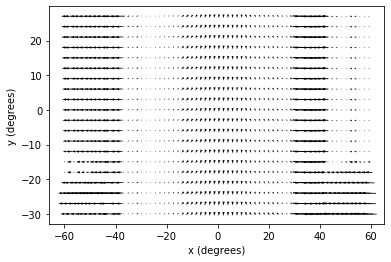

In [34]:
plot(df[FLOW][220])

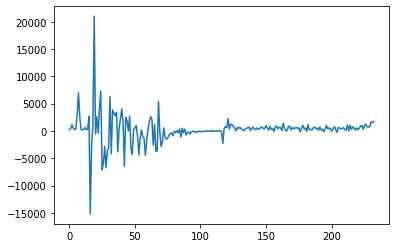

In [35]:
plt.plot(act)

### Conclusions

This does not seem to be working. There must be a bug somewhere.

## Activation online with 120 FOV

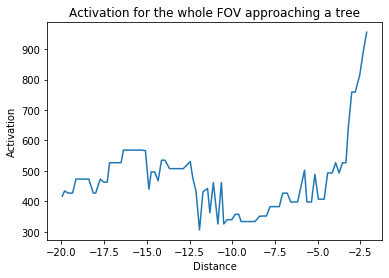

In [33]:
data2 = 'csv/0-obstacle-0.csv'
df2 = pd.read_csv(data2)
df2[ACT] = df2[ACT].apply(clean_activations)
df2 = df2[df2[DIST] < 20]
ys = df2[ACT].apply(np.median)
dist2 = - df2[DIST]

fig = plt.figure()
plt.plot(dist2, ys)
plt.xlabel('Distance')
plt.ylabel('Activation')
plt.title('Activation for the whole FOV approaching a tree')
plt.savefig('figures/act-tree-FOV-120')



### Conclusions

Seems very promising.

# Activation online with cropped flow

## With normal flow and filters

In [53]:
data3 = 'csv/0-obstacle-0-tunnel.csv'
df3 = pd.read_csv(data3)
df3[ACT] = df3[ACT].apply(clean_activations)
df3 = df3[df3[DIST] < 20]
ys = df3[ACT].apply(np.median)
dist3 = - df3[DIST]

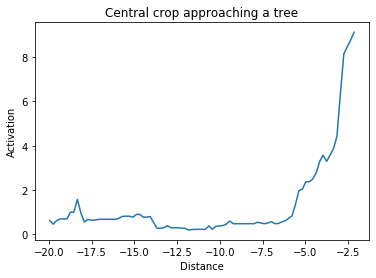

In [54]:
fig = plt.figure()
plt.plot(dist3, ys)
plt.xlabel('Distance')
plt.ylabel('Activation')
plt.title('Central crop approaching a tree')
plt.savefig('figures/act-central-crop-tree')

### Conclusions

Seems normal and very promising.

## With reverse flow and filters

In [37]:
data4 = 'csv/0-obstacle-1-tunnel.csv'
df4 = pd.read_csv(data4)
df4[ACT] = df4[ACT].apply(clean_activations)
df4 = df4[df4[DIST] < 20]
ys = df4[ACT].apply(np.median)
dist4 = - df4[DIST]

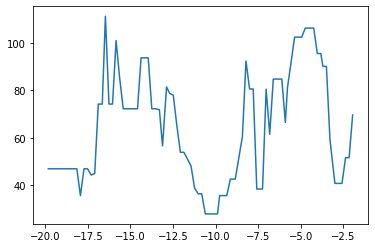

In [38]:
plt.plot(dist4, ys)


### Conclusions

Found the shitty buggggggg

# First right camera

### Heading to an obstacle in its FOV

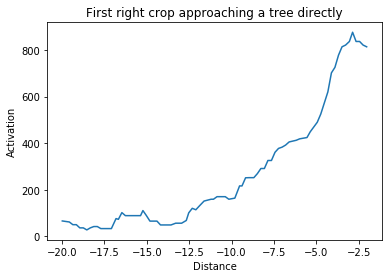

In [51]:
data5 = 'csv/0-obstacle-2-tunnel.csv'
df5 = pd.read_csv(data5)
df5[ACT] = df5[ACT].apply(clean_activations)
df5 = df5[df5[DIST] < 20]
ys = df5[ACT].apply(np.median)
dist5 = - df5[DIST]
plt.plot(dist5, ys)
plt.xlabel('Distance')
plt.ylabel('Activation')
plt.title('First right crop approaching a tree directly')
plt.savefig('figures/act-first-right-crop-tree')

### Without an obstacle in its FOV

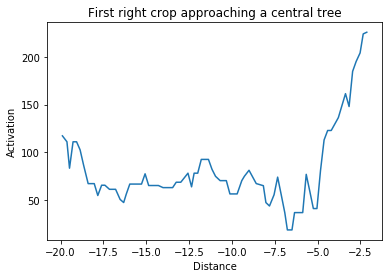

In [50]:
data6 = 'csv/0-obstacle-3-tunnel.csv'
df6 = pd.read_csv(data6)
df6[ACT] = df6[ACT].apply(clean_activations)
df6 = df6[df6[DIST] < 20]
ys = df6[ACT].apply(np.median)
dist6 = - df6[DIST]
plt.plot(dist6, ys)
plt.xlabel('Distance')
plt.ylabel('Activation')
plt.title('First right crop approaching a central tree')
plt.savefig('figures/act-first-right-crop-no-tree')

### Conclusions

- It is probably seeing the central tree. 
- Regardless, the activation is much lower than in the previous one.

- This can be an advantage: if the activation is high in all cameras we might be too close. 

## Second right camera

### With an obstacle in its FOV

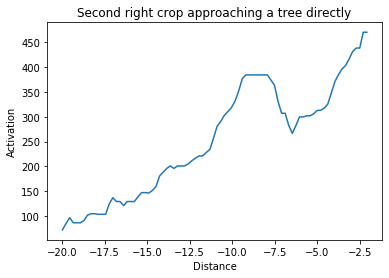

In [49]:
data6 = 'csv/0-obstacle-4-tunnel.csv'
df6 = pd.read_csv(data6)
df6[ACT] = df6[ACT].apply(clean_activations)
df6 = df6[df6[DIST] < 20]
ys = df6[ACT].apply(np.median)
dist6 = - df6[DIST]
plt.plot(dist6, ys)
plt.xlabel('Distance')
plt.ylabel('Activation')
plt.title('Second right crop approaching a tree directly')
plt.savefig('figures/act-second-right-crop-tree')

### Without an obstacle in its FOV

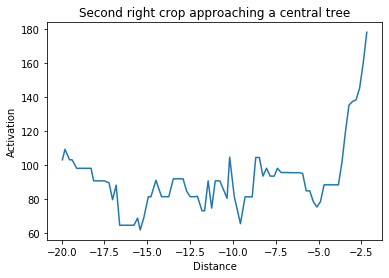

In [48]:
data7 = 'csv/0-obstacle-5-tunnel.csv'
df7 = pd.read_csv(data7)
df7[ACT] = df7[ACT].apply(clean_activations)
df7 = df7[df7[DIST] < 20]
ys = df7[ACT].apply(np.median)
dist7 = - df7[DIST]
plt.plot(dist7, ys)
plt.xlabel('Distance')
plt.ylabel('Activation')
plt.title('Second right crop approaching a central tree')
plt.savefig('figures/act-second-right-crop-no-tree')

### Conclusions

- The same thing as before happens, but a tiny bit less.
- It is as expected